<a href="https://colab.research.google.com/github/Farrelino77/Metnum_Pertemuan10_Bagas_Farrelino/blob/main/metnum_pertemuan10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

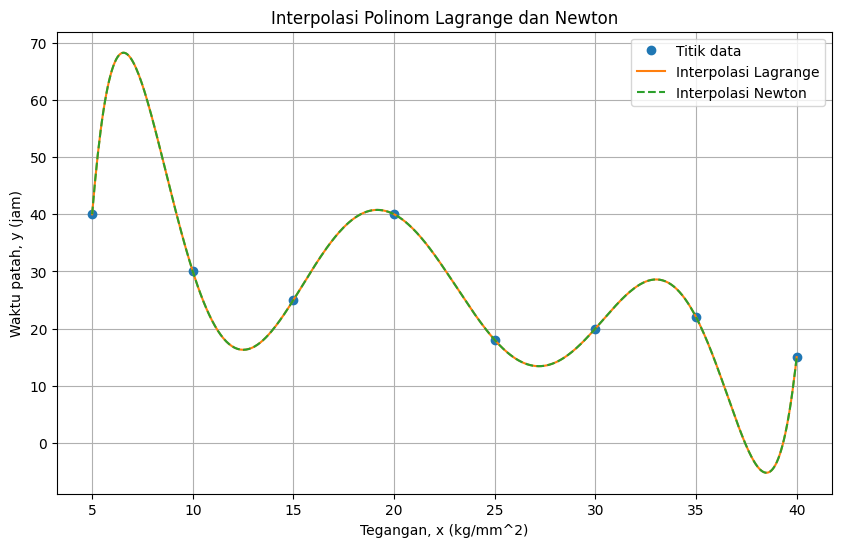

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
x = np.array([5, 10, 15, 20, 25, 30, 35, 40])
y = np.array([40, 30, 25, 40, 18, 20, 22, 15])

# Lagrange interpolation function
def lagrange_interpolation(x_points, y_points, x):
    def L(k, x):
        terms = [(x - x_points[j]) / (x_points[k] - x_points[j]) for j in range(len(x_points)) if j != k]
        return np.prod(terms, axis=0)

    P = sum(y_points[k] * L(k, x) for k in range(len(x_points)))
    return P

# Newton interpolation function
def newton_interpolation(x_points, y_points, x):
    n = len(x_points)
    divided_diff = np.zeros((n, n))
    divided_diff[:, 0] = y_points

    for j in range(1, n):
        for i in range(n - j):
            divided_diff[i][j] = (divided_diff[i+1][j-1] - divided_diff[i][j-1]) / (x_points[i+j] - x_points[i])

    def N(x):
        result = divided_diff[0, 0]
        product_term = 1.0
        for i in range(1, n):
            product_term *= (x - x_points[i-1])
            result += divided_diff[0, i] * product_term
        return result

    return N(x)

# Generating test points
x_test = np.linspace(5, 40, 500)

# Evaluating the interpolations
y_lagrange = [lagrange_interpolation(x, y, xi) for xi in x_test]
y_newton = [newton_interpolation(x, y, xi) for xi in x_test]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Titik data')
plt.plot(x_test, y_lagrange, '-', label='Interpolasi Lagrange')
plt.plot(x_test, y_newton, '--', label='Interpolasi Newton')
plt.legend()
plt.xlabel('Tegangan, x (kg/mm^2)')
plt.ylabel('Waktu patah, y (jam)')
plt.title('Interpolasi Polinom Lagrange dan Newton')
plt.grid(True)
plt.show()
